In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Загрузка данных из модуля datasets библиотеки sklearn__

In [2]:
# импортируем данные и помести их в переменную cancer 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
type(cancer)

sklearn.utils._bunch.Bunch

In [4]:
# посмотрим на сотаавляющие датасета
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# создадим Dataframe
# названия столбцов возьмем из cancer.feature_names
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# добавим целевую переменную
cancer_df['target'] = cancer.target

# выведем первые пять наблюдений
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# расшифруем 0 и 1 в значениях целвой переменной
# для этого посчитаем сколько раз встречается 0 и сколько раз 1
unique, counts = np.unique(cancer.target, return_counts = True)
unique, counts

(array([0, 1]), array([212, 357], dtype=int64))

0 - злокачественное образование, 1 - доброкачественное

In [8]:
# посмотрим на тип переменных
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# посмотрим основные статистические показатели
cancer_df.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


__Предварительная обработка данных__

In [10]:
# проверим датасет на наличие пропущенных значений
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Нормализация данных

In [11]:
# приведем все независимые переменные к единому масштабу

# снова создадим датафрейм без целевой переменной
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(cancer_df)

# на выходе получается массив Numpy
type(scaled_data)

numpy.ndarray

In [12]:
# преобразуем scaled_data обратно в датафрейм
cancer_df_scaled = pd.DataFrame(scaled_data, columns = cancer.feature_names)

# добавим целевую переменную
cancer_df_scaled['target'] = cancer.target

cancer_df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [13]:
# посмотрим на статистические показатели после нормализации
cancer_df_scaled.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.63
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,-2.03,-2.23,-1.98,-1.45,-3.11,-1.61,-1.11,-1.26,-2.74,-1.82,...,-2.22,-1.69,-1.22,-2.68,-1.44,-1.31,-1.75,-2.16,-1.60,0.00
25%,-0.69,-0.73,-0.69,-0.67,-0.71,-0.75,-0.74,-0.74,-0.70,-0.72,...,-0.75,-0.69,-0.64,-0.69,-0.68,-0.76,-0.76,-0.64,-0.69,0.00
50%,-0.22,-0.10,-0.24,-0.30,-0.03,-0.22,-0.34,-0.40,-0.07,-0.18,...,-0.04,-0.29,-0.34,-0.05,-0.27,-0.22,-0.22,-0.13,-0.22,1.00
75%,0.47,0.58,0.50,0.36,0.64,0.49,0.53,0.65,0.53,0.47,...,0.66,0.54,0.36,0.60,0.54,0.53,0.71,0.45,0.45,1.00
max,3.97,4.65,3.98,5.25,4.77,4.57,4.24,3.93,4.48,4.91,...,3.89,4.29,5.93,3.96,5.11,4.70,2.69,6.05,6.85,1.00


Проводить нормализацию данных нужно после разбиения на обучающую и тестовую выборку


__Исследовательский анализ данных__

Найдем признаки с наибольшими отличиями в зависимости от значения целовой переменной

In [14]:
# сгруппируем данные по целевой переменной, расчитаем среднее и перевернем (транспонируем) наш датафрейм
data = cancer_df_scaled.groupby('target').mean().T
data.head()

target,0,1
mean radius,0.947340,-0.562566
mean texture,0.538776,-0.319945
mean perimeter,0.963700,-0.572281
mean area,0.920031,-0.546349
mean smoothness,0.465295,-0.276309


In [15]:
# добавим новую колонку
# вычтем одну колонку из другой и вычислим модуль
data['diff'] = abs(data.iloc[:, 0] - data.iloc[:, 1])

# остается отсортировать наш датафрейм по столбцу разницы средних в нисходящем порядке
data = data.sort_values(by = ['diff'], ascending = False)
data.head(10)

target,0,1,diff
worst concave points,1.029791,-0.611529,1.641320
worst perimeter,1.015969,-0.603320,1.619289
mean concave points,1.007793,-0.598465,1.606258
worst radius,1.007585,-0.598342,1.605927
mean perimeter,0.963700,-0.572281,1.535981
worst area,0.952267,-0.565492,1.517759
mean radius,0.947340,-0.562566,1.509906
mean area,0.920031,-0.546349,1.466380
mean concavity,0.903649,-0.536621,1.440270
worst concavity,0.855960,-0.508301,1.364261


Посмотрим на эти различия графически

Text(0.5, 1.0, 'Распределение worst concave points для двух типов опухолей')

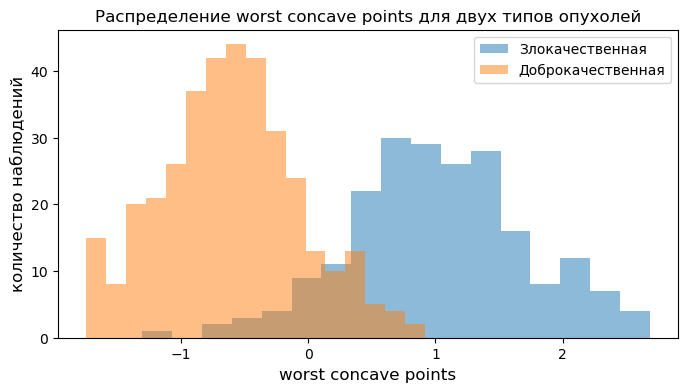

In [16]:
# задаем количество интервалов
bins = 17

# размер графика
plt.figure(figsize = (8, 4))

# из датафрейма cancer_df_scaled выберем столбец worst concave points
# строки, где таргет = 0 (злокачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 0, 'worst concave points'], 
         bins, alpha = 0.5, label = 'Злокачественная')

# строки, где таргет = 1 (доброкачественная)
plt.hist(cancer_df_scaled.loc[cancer_df_scaled['target'] == 1, 'worst concave points'], 
         bins, alpha = 0.5, label = 'Доброкачественная')

plt.legend(loc = 'upper right')
plt.xlabel('worst concave points', fontsize = 12)
plt.ylabel('количество наблюдений', fontsize = 12)
plt.title('Распределение worst concave points для двух типов опухолей', fontsize = 12)

__Отбор и выделение признаков__

Поместим наши признаки в переменную Х, а классы в переменную у

In [17]:
# возьмем названия признаков из индекса вспомогательного датафрейма data,
# преобразуем их в список и сделаем срез по первым 10 значениям
features = list(data.index[:10])
print(features)

['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'mean area', 'mean concavity', 'worst concavity']


In [18]:
# теперь отфильтруем исходный датафрейм cancer_df_scaled по этим признакам
X = cancer_df_scaled[features]

# а в переменную у запишем классы
y = cancer_df_scaled['target']

__Обучение и оценка качества модели__

Разделение на обучающую и тестовую выборки

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Обучение модели и прогноз

In [20]:
# импортируем лог рег 
from sklearn.linear_model import LogisticRegression

In [21]:
# создаем объект этого класса
model = LogisticRegression()

# обучим модель
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

Оценка качества модели

In [23]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])

# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
model_matrix_df

,0,1
0,104,4
1,2,61


In [24]:
# добавим подписи к столбцам и строкам через параметры columns и index
# столбец это прогноз, строка - фактическое значение
# 0 - добрю образование, 1 - злок. образование (только в рамках матрицы ошибок!)
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз добр.', 'Прогноз злок.'],
                              index = ['Факт добр.', 'Факт злок.'])
model_matrix_df

,Прогноз добр.,Прогноз злок.
Факт добр.,104,4
Факт злок.,2,61


In [25]:
# воспользуемся встроенной в sklearn метрикой AUC
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy, 2)

0.96